In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:
a = 282e-12
q = 1.602e-19
k = 8.9875517923e9

K = k * q * q

In [19]:
ex = np.array([1, 0, 0])
ey = np.array([0, 1, 0])
ez = np.array([0, 0, 1])

order = 100
n = 2 * order + 1

Cl = []
Na = []

for i in range(-order, order+1):
      for j in range(-order, order+1):
          for k in range(-order, order+1):
                if ((i+j+k)%2 == 0):
                    Na.append(a * (i * ex + j * ey + k * ez))
                else:
                    Cl.append(a * (i * ex + j * ey + k * ez))

Na.pop(n * n * n // 4)

array([0., 0., 0.])

In [5]:
def F(x, xq, power):
    dx = x - xq
    r = math.sqrt(dx.dot(dx))
    return K / math.pow(r, power) * dx/r, K / ((power - 1) * math.pow(r, power - 1))


In [6]:
def fres(x, power):
    Fres = np.zeros(3)
    U = 0

    for xq in Cl:
        df, du = F(x, xq, power)
        Fres = Fres - df
        U = U - du

    for xq in Na:
        df, du = F(x, xq, power)
        Fres = Fres + df
        U = U + du

    return Fres, U

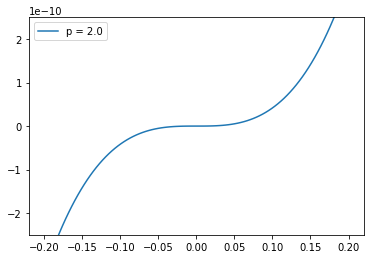

In [7]:
powers = [2.]
x0 = a/5
y0 = 0.25e-9

x = np.linspace(-x0, x0, 100)
y = np.zeros(100)

fig, ax = plt.subplots()
ax.set_ylim([-y0, y0])

for p in powers:
    for i in range(100):
        f, u = fres(np.array([x[i], 0, 0]), p)
        y[i] = f[0]
    
    ax.plot(x/a, y, label='p = ' + str(p))

ax.legend()

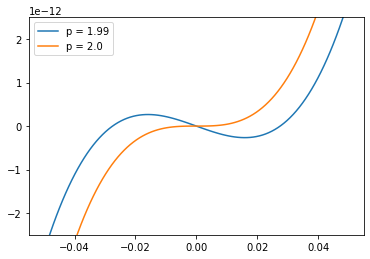

In [8]:
powers = [1.99, 2.]
x0 = a/20
y0 = 0.25e-11

x = np.linspace(-x0, x0, 100)
y = np.zeros(100)

fig, ax = plt.subplots()
ax.set_ylim([-y0, y0])

for p in powers:
    for i in range(100):
        f, u = fres(np.array([x[i], 0, 0]), p)
        y[i] = f[0]
    
    ax.plot(x/a, y, label='p = ' + str(p))

ax.legend()

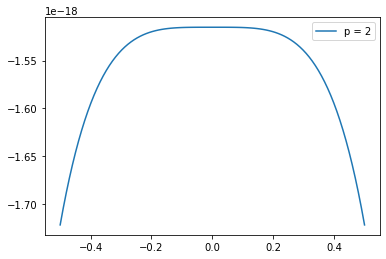

In [18]:
powers = [2]
x0 = a/2
# ymin = -1.5155e-18
# ymax = -1.5150e-18

x = np.linspace(-x0, x0, 100)
y = np.zeros(100)

fig, ax = plt.subplots()
# ax.set_ylim([ymin, ymax])

for p in powers:
    for i in range(100):
        f, u = fres(np.array([x[i], 0, 0]), p)
        y[i] = u
    
    ax.plot(x/a, y, label='p = ' + str(p))

ax.legend()

In [20]:
f, u = fres(np.array([0, 0, 0]), 2)
print(u)

alpha = 1.747564594633

E0 = - K / a
E = alpha * E0
print(E)

-1.4246905995100974e-18
-1.4293894049635758e-18


# Further Reading

[Bonding in crystalline solids](https://opentextbc.ca/universityphysicsv3openstax/chapter/bonding-in-crystalline-solids/)